In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
import librosa
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Available GPUs:", physical_devices)
tf.config.experimental.set_visible_devices(physical_devices[1], 'GPU')

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

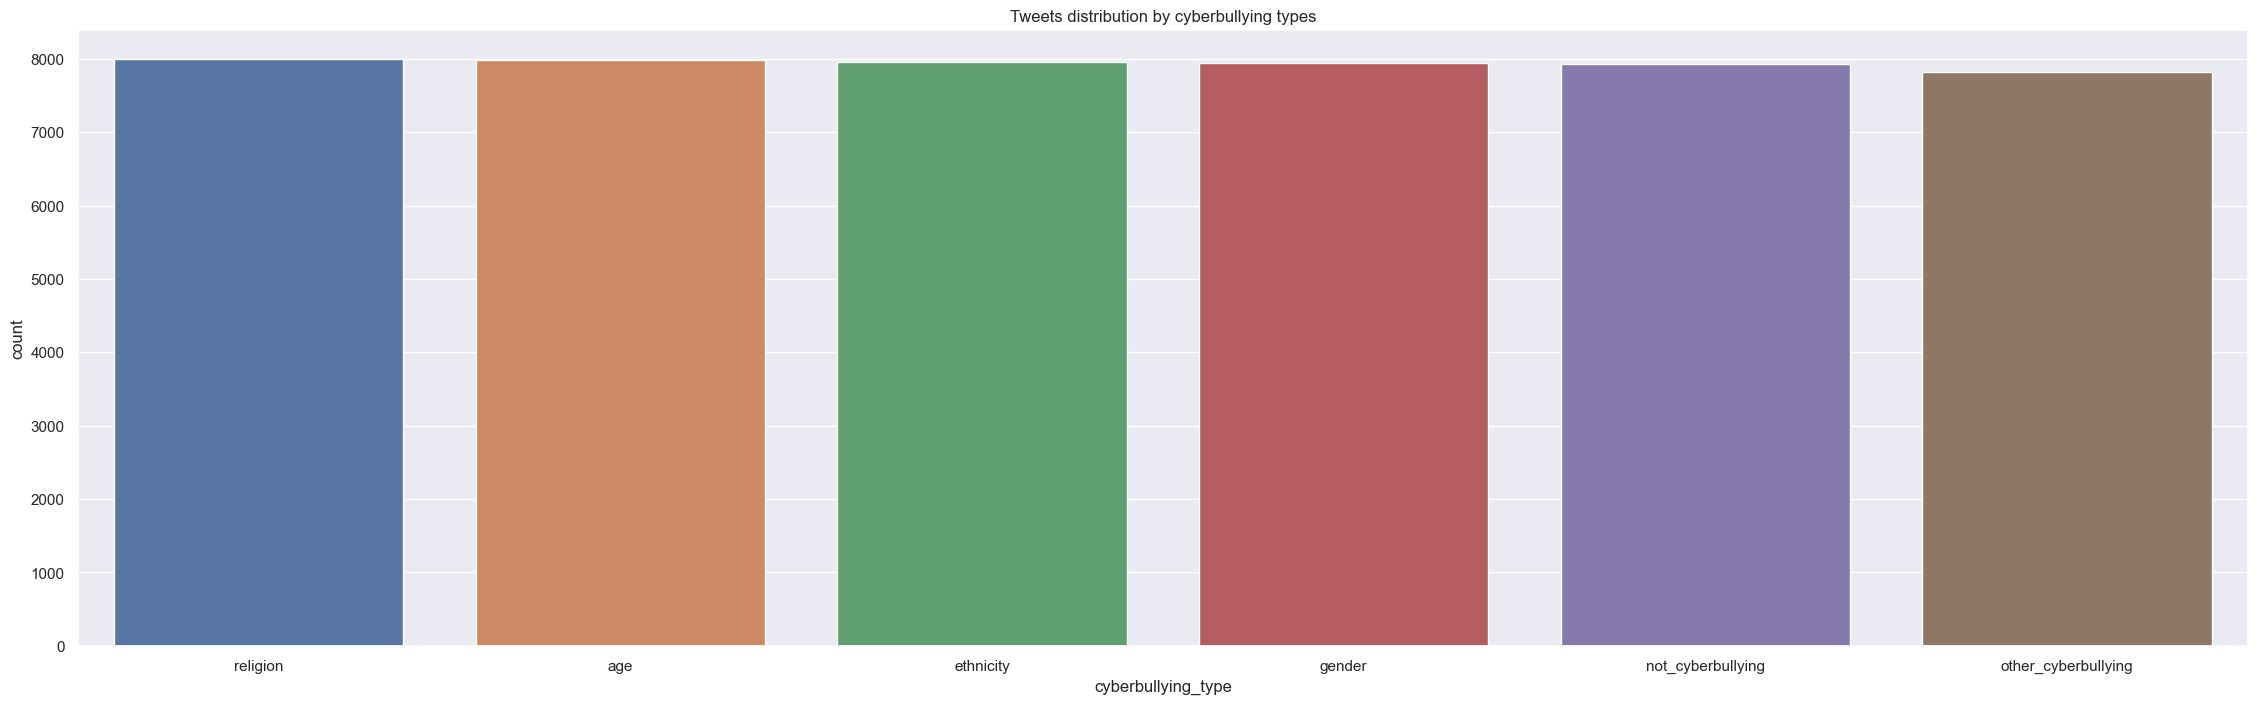

In [3]:
df = pd.read_csv("C:/Users/AMI_LAB/Downloads/Lab Work/code/cyberbully classify/dataset_preparation/categorical_data.csv")
df = df.drop_duplicates()
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

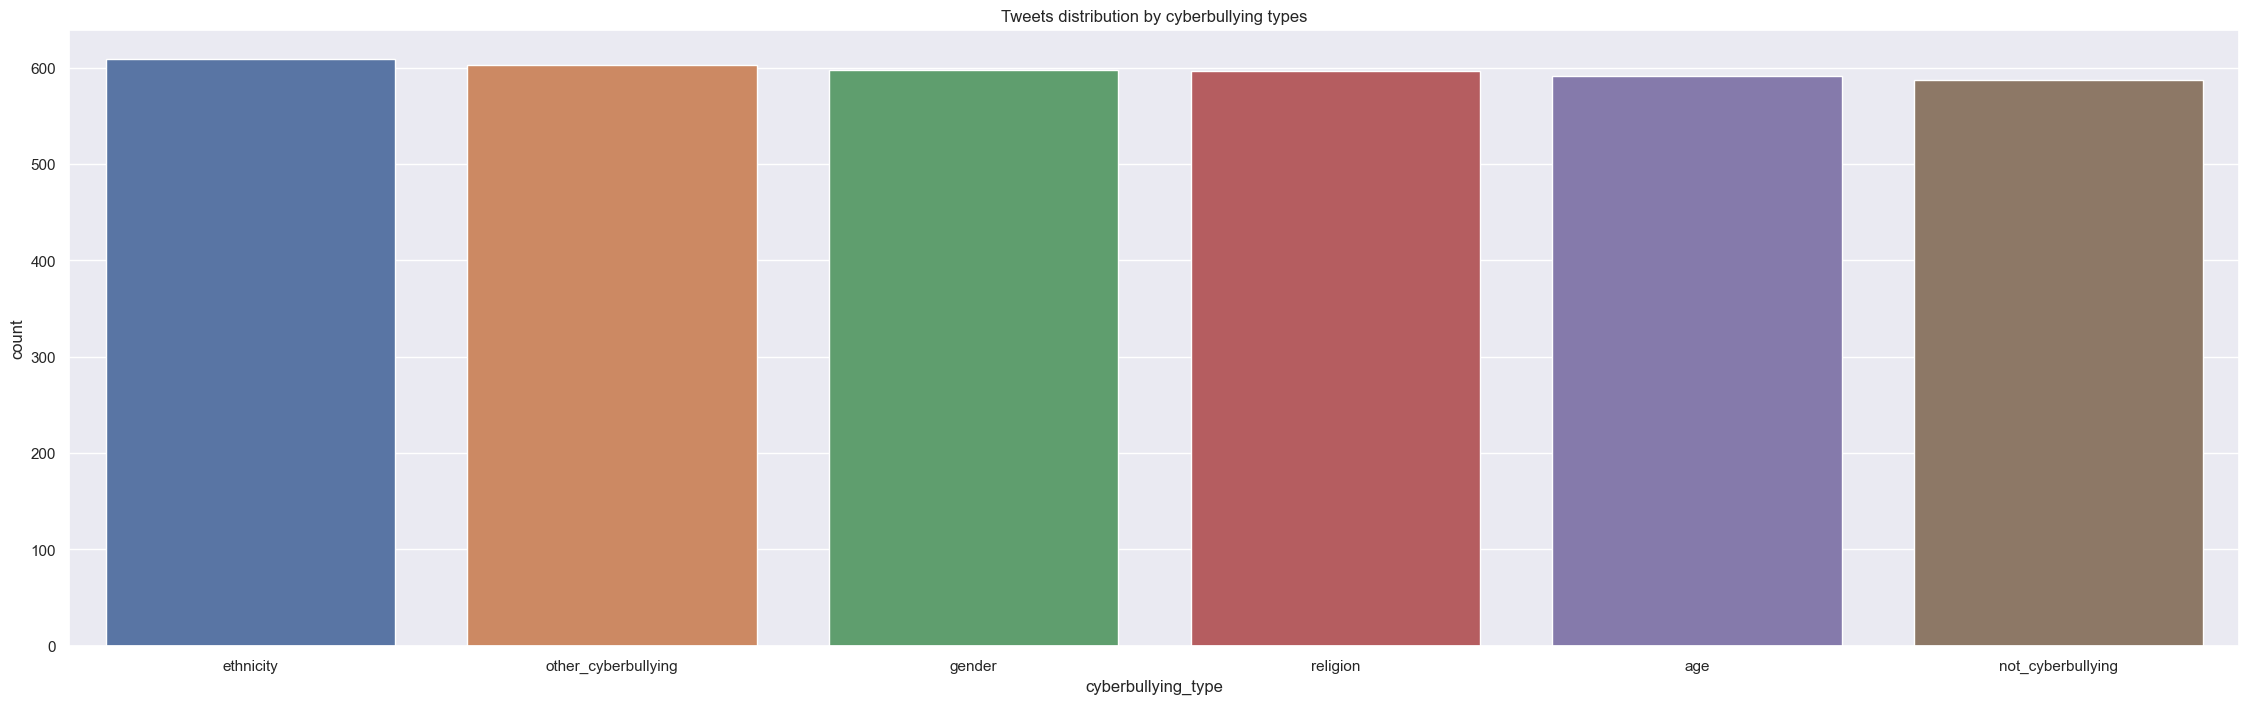

In [4]:
classes=list(df["cyberbullying_type"].unique())
df_list=[]

flux=700-350
for i in range(len(classes)):
    sub_df=df[df["cyberbullying_type"]==classes[i]]
    #drop first 7000 rows of sub_df
    if (classes[i]=="other_cyberbullying"):
        sub_df=sub_df.drop(sub_df.index[:6870+flux])
    elif (classes[i]=="religion"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])
    elif (classes[i]=="age"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])       
    else:
        sub_df=sub_df.drop(sub_df.index[:7000+flux])
    df_list.append(sub_df)


#concatenate all sub_df
df_dropped=pd.concat(df_list)
df_drop=df_dropped.reset_index()


df = df_drop
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [5]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMI_LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AMI_LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMI_LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AMI_LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
def initial_cleaning(text):
    # text = re.sub(r"^RT[\s]+","",text)
    # text = text.lower()
    # text = re.sub(r"https?:\/\/.*[\r\n]*","https",text)
    # text = re.sub(r"@[A-Za-z0-9]+","",text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "]+", flags=re.UNICODE)

    text=emoji_pattern.sub(r'', text)
    # text = re.sub(r'[0-9]',' ',text) 
    # text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    # text = re.sub('\s+', ' ', text)
    return text

def remove_stopword(text):
    a = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
def lemmatizer(text):
    word_pos_tags = nltk.pos_tag(tokenizer.tokenize(text))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)



def text_preprocessing(text):
    return initial_cleaning(text)

df["original_tweet"] = df.tweet_text
df.tweet_text = df.tweet_text.apply(lambda x: text_preprocessing(x))
df

,index,tweet_text,cyberbullying_type,original_tweet
0,7357,RT @GCobber99: Bloody hell is there One libera...,not_cyberbullying,RT @GCobber99: Bloody hell is there One libera...
1,7358,"assunto no programa do Jô agora é bullying, ou...",not_cyberbullying,"assunto no programa do Jô agora é bullying, ou..."
2,7359,RT @_peech: How @therealroseanne sees trans pp...,not_cyberbullying,RT @_peech: How @therealroseanne sees trans pp...
3,7360,Colin's in good form tonight #MKR,not_cyberbullying,Colin's in good form tonight #MKR
4,7361,i would never want to get bullied.,not_cyberbullying,i would never want to get bullied.
...,...,...,...,...
3581,47687,"Black ppl aren't expected to do anything, depe...",ethnicity,"Black ppl aren't expected to do anything, depe..."
3582,47688,Turner did not withhold his disappointment. Tu...,ethnicity,Turner did not withhold his disappointment. Tu...
3583,47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,I swear to God. This dumb nigger bitch. I have...
3584,47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [7]:
from nltk.util import ngrams
text_list=df["tweet_text"].tolist()
omega_text_words = []
n=1


for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [9]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labels=np.array(df["cyberbullying_type"].tolist())
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(6, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)

 age  -----------------------------  [1. 0. 0. 0. 0. 0.]
 ethnicity  -----------------------------  [0. 1. 0. 0. 0. 0.]
 gender  -----------------------------  [0. 0. 1. 0. 0. 0.]
 not_cyberbullying  -----------------------------  [0. 0. 0. 1. 0. 0.]
 other_cyberbullying  -----------------------------  [0. 0. 0. 0. 1. 0.]
 religion  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [10]:
from numpy import dot
from numpy.linalg import norm


#Our sentences we like to encode
sentences = text_list
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)


In [11]:
from numpy.random.mtrand import random
from sklearn.utils import shuffle
sentences,text_list,embeddings,integer_encoded,onehot_encoded=shuffle(sentences,text_list,embeddings,integer_encoded,onehot_encoded,random_state=0)

In [12]:
#construct over adjency matrix
from sklearn.metrics.pairwise import cosine_similarity
A=cosine_similarity(embeddings, embeddings)
thresh=0.5
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
      if A[i,j]<thresh:
        A[i,j]=0


source=[]
target=[]
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if A[i,j]>0:
            source.append(i)
            target.append(j)



Node_labels=onehot_encoded

edges = {'source': source,
        'target': target}

# Create DataFrame
edges = pd.DataFrame(edges,index=list(np.arange(len(source))))

In [13]:
features_matrix=embeddings

indexer=list(np.arange(features_matrix.shape[0]))

node_features = pd.DataFrame(features_matrix,index=[str(x) for x in indexer])

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN
G = sg.StellarGraph(node_features, edges.astype(str))

In [14]:
A_norm=A

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


target = {'0': Node_labels[:,0],'1': Node_labels[:,1],'2': Node_labels[:,2],'3': Node_labels[:,3],'4': Node_labels[:,4],'5': Node_labels[:,5]}
  
# Create DataFrame
targets = pd.DataFrame(target,index=list(np.arange(len(Node_labels))))

indexy=np.arange(len(Node_labels))

train_pages, test_pages,indexy_train,indexy_test = train_test_split(targets,indexy ,train_size=int(0.8*len(targets)))
val_pages, test_pages,indexy_val,indexy_test = train_test_split(test_pages,indexy_test ,train_size=int(0.5*len(test_pages)))

train_targets = train_pages
val_targets = val_pages
test_targets =test_pages


train_idx=list(indexy_train)
val_idx=list(indexy_val)
test_idx=list(indexy_test)

In [15]:
print("Orignal Targets Length: ",len(targets))
print("Train Target Length: ",len(train_targets))
print("Validation Target Length: ",len(val_targets))
print("Test Target Length: ",len(test_targets))

Orignal Targets Length:  3586
Train Target Length:  2868
Validation Target Length:  359
Test Target Length:  359


In [16]:
# Define the function to get these indices
def get_node_indices(G, ids):
    # find the indices of the nodes
    node_ids = np.asarray(ids)
    flat_node_ids = list(node_ids.reshape(-1))
    flat_node_ids=[str(x) for x in flat_node_ids]


    flat_node_indices = G.node_ids_to_ilocs(flat_node_ids) # in-built function makes it really easy
    # back to the original shape
    node_indices = flat_node_indices.reshape(1, len(node_ids)) # add 1 extra dimension
    
    return node_indices

train_indices = get_node_indices(G, train_pages.index)
val_indices = get_node_indices(G, val_pages.index)
test_indices = get_node_indices(G, test_pages.index)




# Expand dimensions
features_input = np.expand_dims(features_matrix, 0)
A_input = np.expand_dims(A_norm, 0)

y_train = np.expand_dims(train_targets, 0)
y_val = np.expand_dims(val_targets, 0)
y_test = np.expand_dims(test_targets, 0)



In [17]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import activations, initializers, constraints, regularizers
from tensorflow.keras.layers import Input, Layer, Lambda, Dropout, Reshape, Dense
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import layers, optimizers, losses, metrics, Model



from stellargraph.layer.gcn import GraphConvolution, GatherIndices


# Initialise GCN parameters
kernel_initializer="glorot_uniform"
bias = True
bias_initializer="zeros"
n_layers = 2

n_features = features_input.shape[2]
n_nodes = features_input.shape[1]


x_features = Input(batch_shape=(1, n_nodes, n_features))
x_indices = Input(batch_shape=(1, None), dtype="int32")
x_adjacency = Input(batch_shape=(1, n_nodes, n_nodes))
x_inp = [x_features, x_indices, x_adjacency]
x_inp

# Build the model
x = (x_features)
x = GraphConvolution(32, activation='relu', 
                     use_bias=True,
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer)([x, x_adjacency])
x = Dropout(0.5)(x)
x = GraphConvolution(32, activation='relu', 
                     use_bias=True,
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer)([x, x_adjacency])

x = GatherIndices(batch_dims=1)([x, x_indices])
output = Dense(6, activation='softmax')(x)




model = Model(inputs=[x_features, x_indices, x_adjacency], outputs=output)
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 3586, 384)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(1, 3586, 3586)]    0           []                               
                                                                                                  
 graph_convolution (GraphConvol  (1, 3586, 32)       12320       ['input_1[0][0]',                
 ution)                                                           'input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (1, 3586, 32)        0           ['graph_convolution[0][0]']  

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 156.5291 - acc: 0.1280 - val_loss: 95.9552 - val_acc: 0.0891
Epoch 2/50
1/1 [==============================] - 0s 62ms/step - loss: 101.0220 - acc: 0.1140 - val_loss: 48.9853 - val_acc: 0.0696
Epoch 3/50
1/1 [==============================] - 0s 62ms/step - loss: 49.6361 - acc: 0.1119 - val_loss: 28.0411 - val_acc: 0.1365
Epoch 4/50
1/1 [==============================] - 0s 62ms/step - loss: 28.4138 - acc: 0.1900 - val_loss: 14.0111 - val_acc: 0.1922
Epoch 5/50
1/1 [==============================] - 0s 63ms/step - loss: 15.1346 - acc: 0.2225 - val_loss: 8.8832 - val_acc: 0.3621
Epoch 6/50
1/1 [==============================] - 0s 78ms/step - loss: 9.2545 - acc: 0.3243 - val_loss: 8.3180 - val_acc: 0.3955
Epoch 7/50
1/1 [==============================] - 0s 63ms/step - loss: 9.9228 - acc: 0.3835 - val_loss: 7.4942 - val_acc: 0.4345
Epoch 8/50
1/1 [==============================] - 0s 62ms/step - loss: 8.7532 - acc: 0.4

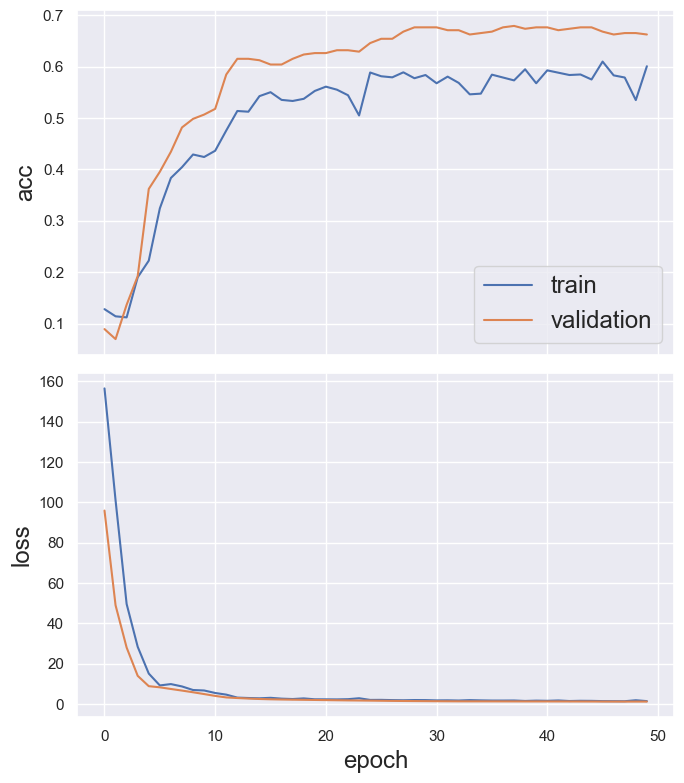

In [18]:


model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

es_callback = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)



history = model.fit(
    x = [features_input, train_indices, A_input],
    y = y_train,
    batch_size = 16,
    epochs=50,
    validation_data=([features_input, val_indices, A_input], y_val),
    verbose=1,
    # shuffle=True,
    # callbacks=[es_callback],
)


sg.utils.plot_history(history)


In [19]:
# save val_loss, val_acc, loss, acc as csv with headers
acc = history.history['acc']
val_acc = history.history['val_acc']


loss = history.history['loss']
val_loss = history.history['val_loss']

# save val_loss, val_acc, loss, acc as csv with headers
import pandas as pd
df = pd.DataFrame({'val_loss':val_loss, 'val_acc':val_acc, 'loss':loss, 'acc':acc})
df.to_csv('Node_classify_S_transformer_GCN.csv', index=False)


In [20]:
_, acc = model.evaluate([features_input, test_indices, A_input], y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 0s 31ms/step - loss: 1.4127 - acc: 0.6797
Accuracy =  67.9665744304657 %


1/1 [==============================] - 0s 109ms/step


<AxesSubplot:>

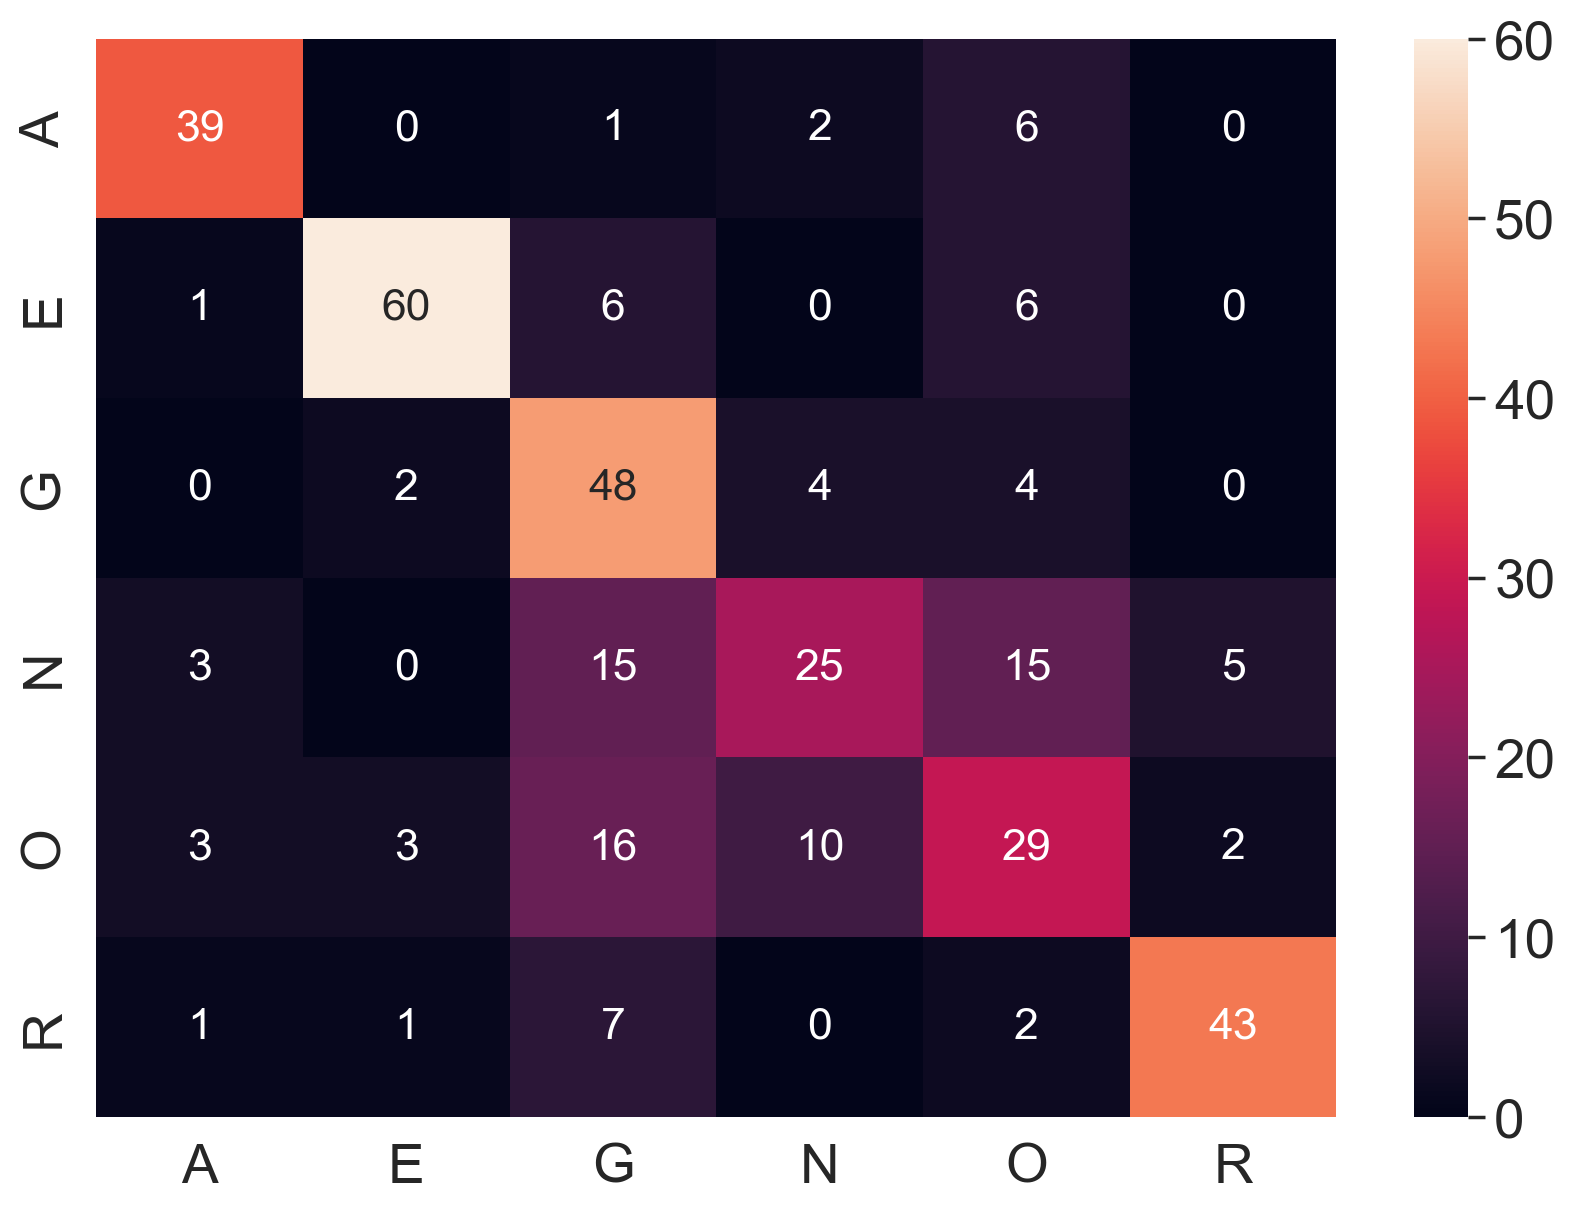

In [21]:
subvert_ytest=np.squeeze(y_test,axis=0)
ref=np.argmax(subvert_ytest,axis=1)
predy=model.predict([features_input, test_indices, A_input])
predy=np.squeeze(predy,axis=0)
predictions=np.argmax(predy,axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ref,predictions)



label_names=[]
for key,_ in mapping.items():
    label_names.append(key)

    
label_abbreviations = [label[0].upper() for label in label_names]


#plot confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, label_abbreviations, label_abbreviations)
plt.figure(figsize = (10,7),dpi=200)
sn.set(font_scale=1.8)  # Increase the font size for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='d') # font size

In [22]:
from sklearn.metrics import classification_report

print(classification_report(ref, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8298    0.8125    0.8211        48
           1     0.9091    0.8219    0.8633        73
           2     0.5161    0.8276    0.6358        58
           3     0.6098    0.3968    0.4808        63
           4     0.4677    0.4603    0.4640        63
           5     0.8600    0.7963    0.8269        54

    accuracy                         0.6797       359
   macro avg     0.6988    0.6859    0.6820       359
weighted avg     0.6976    0.6797    0.6782       359

